## Showcases The Use Of Expectile GAM (Primer For Price Optimization)

In [ ]:
# install libraries
!pip install pygam

In [1]:
# import libraries
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pygam import s, ExpectileGAM

warnings.filterwarnings("ignore")

In [2]:
directory = r'/Users/akash/Documents/GitHub/priceOptimizationUsingPyGAM'
os.chdir(directory)
print(os.getcwd())

/Users/akash/Documents/GitHub/priceOptimizationUsingPyGAM


### Data generation

In [4]:
# data generation
np. random.seed(0)
n = 100
price = np.sort(np.random.exponential(scale=100, size=n))
quantity = 1000 - 5 * price + np.random.normal(loc=0, scale=50, size=n) 
quantity = quantity.clip(min=0)

# add outliers
n_outliers = 10
outlier_prices = np.random.uniform(5, 50, n_outliers)
outlier_quantity = 1100 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

# add outliers
n_outliers = 10
outlier_prices = np.random.uniform(51, 100, n_outliers)
outlier_quantity = 900 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

df = pd.DataFrame({
    'Price': price,
    'Quantity': quantity
})

# filter out prices less than 5
df = df[df['Price'] >= 5]

### Modeling

In [9]:
# reshape data
X = df['Price']
y = df['Quantity']


# quantile GAMs
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

for q in quantiles: 
    gam = ExpectileGAM(s(0), expectile=q) 
    gam.fit(X, y)
    gam_results[q] = gam
    
gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

### Visualization

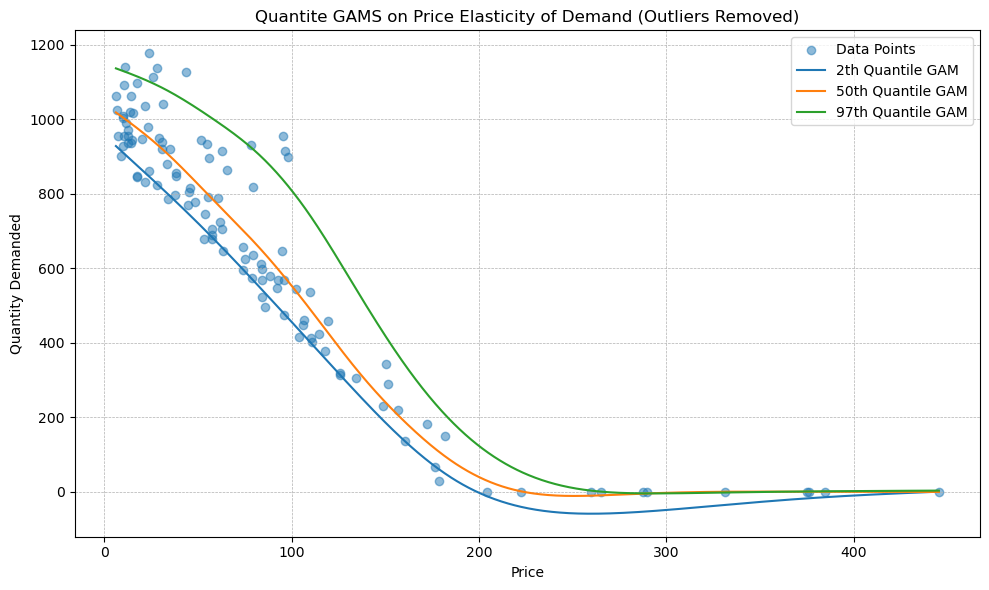

In [12]:
# ⁠scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Quantity'], alpha=0.5, label='Data Points')

# plot Quantile GAMs
XX = np.linspace(df['Price'].min(), df['Price'].max(), 1000).reshape(-1, 1)

for q, gam in gam_results.items(): 
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Quantile GAM')
    
# add title and labels 
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.title('Quantite GAMS on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Expectile GAM Benefits:
1. Quantile GAMs take into account changing variable
2. Allows us to take into account the best and worst case scenarios in our Price Optimization